---
title: "CSX46 Class Notebook 6 - Breadth-first search (BFS)"
author: "Trent VanHawkins"
date: today
format: 
    pdf:
        geometry: "margin=0.75in"
        mathspec: true
        code-overflow: wrap
        cap-location: bottom
        tbl-cap-location: bottom
        header-includes: 
        - \usepackage{fancyhdr, amsthm, amssymb,amsfonts,amsthm, amsmath, bbm}
        - \usepackage{float, tabularx}
        - \floatplacement{table}{H}
        - \pagestyle{fancy}
        - \fancyhead[R]{Notebook 6}
        - \fancyhead[L]{Trent VanHawkins}
        - \fancyfoot[C]{\thepage} # Center page number at bottom of each page
page-layout: full
execute: 
  eval: true
---

## Objective: write and test a function that can compute single-vertex shortest paths in an unweighted simple graph.

For this notebook, we will need the python packages `cairo`, `igraph`, `numpy`, `math`, `timeit`, and `random`.

In [1]:
import cairo
import igraph, random, math, collections, timeit
import numpy as np

Using `random.seed`, set the random number seed (to the value 1337) so that the graph is always the same, for purposes of reproducibility (we want to know that the "hub" vertex will be vertex 2, and we will test your BFS function starting at that "hub" vertex).

In [2]:
random.seed(1337)

Create a simple 10-vertex random (Barabasi-Albert model) undirected graph `g`, using `igraph.Graph.Barabasi`. Print out the graph summary.

In [39]:
g = igraph.Graph.Barabasi(n = 10, directed=False)

g.summary()


'IGRAPH U--- 10 9 -- '

Let's draw the graph as a network diagram using `igraph.drawing.plot`. Make sure to display the vertex IDs as labels on the plot.

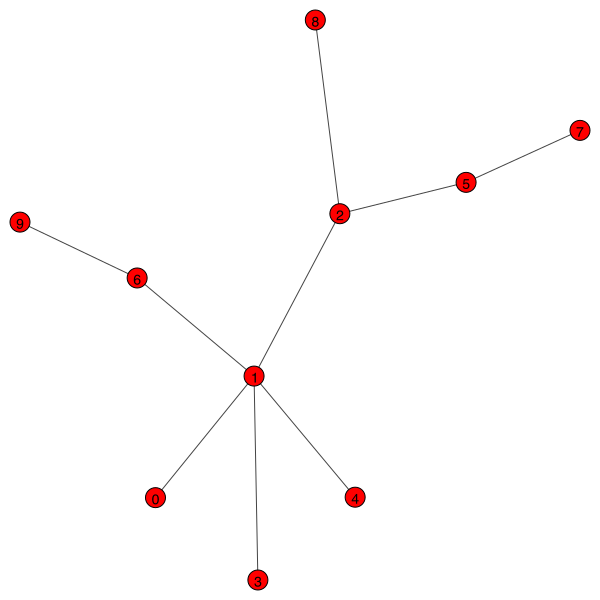

In [16]:
igraph.drawing.plot(g, vertex_label = list(range(0,10)))



Let's take a look at the adjacency list representation of `g`, using the method `igraph.Graph.get_adjlist`.

In [19]:
g_adjlist = g.get_adjlist()
g_adjlist

[[1], [0, 2, 3, 4, 6], [1, 5, 8], [1], [1], [2, 7], [1, 9], [5], [2], [6]]

Let's take a look at the vertex degrees: (use dictionary comprehension to make a dictionary of vertex IDs with associated vertex degree value)

In [21]:
{idx: len(neighbors) for idx, neighbors in enumerate(g_adjlist)}

{0: 1, 1: 5, 2: 3, 3: 1, 4: 1, 5: 2, 6: 2, 7: 1, 8: 1, 9: 1}

Let's implement BFS following Newman's algorithm description which has an array with two pointers into the array (head and tail).

In [28]:
def bfs_single_vertex(p_graph: igraph.Graph,
                      p_vertex: int) -> list:
    # get the VertexSeq object for graph `p_graph` (i.e., `p_graph.vs`), as variable `vs`
    vs = p_graph.vs
    # get the number of indices as variable `N`
    N = len(vs)
    # define a queue as a python list of length `N`, initialized to `np.nan` values
    queue = [np.nan] * N
    # set entry 0 of the list `queue` to contain the value `p_vertex`
    queue[0] = p_vertex
    # create an array of distances,  of length `N`, initialized to `np.nan` values
    distances = [np.nan] * N
    # set the distance value for `p_vertex` to be zero
    distances[p_vertex] = 0
    # initialize the read pointer to position 0 in `queue`
    read_ptr = 0
    # initialize the write pointer to poisition 1 in `queue`
    write_ptr = 1
    # while `read_ptr` is less than `write_ptr`
    while read_ptr < write_ptr:
        # assign the vertex at the head of the queue (`read_ptr` position) to variable `cur_vertex_num`
        cur_vertex_num = queue[read_ptr]
        # move the head of the queue one position (i.e., increment `read_ptr`)
        read_ptr += 1
        # since it is on the queue, we have seen `cur_vertex_num` before, so its distance from `p_vertex`
        # is recorded in `distances`; get that value and assign it to `cur_vertex_dist`
        cur_vertex_dist = distances[cur_vertex_num]
        # for each neighbor vertex `vn_vertex_num` of vertex `cur_vertex_num`: (to get
        # the list of neighbors of a vertex, call the `neighbors` method on the `igraph.Graph`
        # object and pass `cur_vertex_num` as the argument)
        for vn_vertex_num in p_graph.neighbors(cur_vertex_num):
            # check the distance value for `vn_vertex_num`; is it `np.nan`? (if so, we have not seen that vertex before)
            if math.isnan(distances[vn_vertex_num]):
                # if it is an unseen vertex, then the shortest path to it must be
                # of length equal to a single hop from `cur_vertex_num`; so the
                # distance value for `vn_vertex_num` should be `cur_vertex_dist + 1`;
                # record that distance value in distances[vn_vertex_num]
                distances[vn_vertex_num] = cur_vertex_dist + 1
                # add `vn_vertex_num` to the queue by assigning a value to `queue` at position `write_ptr`
                queue[write_ptr] = vn_vertex_num
                # increment `write_ptr` by 1
                write_ptr += 1
    # return the `distances` list
    return distances


Test out your function, starting at vertex 1

In [29]:
bfs_single_vertex(g, 1)

[1, 0, 1, 1, 1, 2, 1, 3, 2, 2]

Now let's compare to what we get when we call the `get_shortest_paths` method on the `igraph.Graph` object, passing `v=1` as the argument to specify vertex 1 as the starting vertex. You'll have to iterate `x` over the result and compute `len(x) - 1` for each of them (use list comprehension).

In [31]:
[len(x) - 1 for x in g.get_shortest_paths(v = 1)]

[1, 0, 1, 1, 1, 2, 1, 3, 2, 2]

Now, let's reimplement BFS using a `Collections.deque` object:

In [32]:
def bfs_single_vertex2(p_graph: igraph.Graph,
                       p_vertex: int) -> list:
    # get the VertexSeq object for graph `p_graph` (i.e., `p_graph.vs`), as variable `vs`
    vs = p_graph.vs
    # get the number of indices as variable `N`
    N = len(vs)
    # create a `collections.deque` object (with `[p_vertex]` as the initial contents)
    # and assign to `queue`
    queue = collections.deque([p_vertex])
    # create a list of distances,  of length `N`, initialized to `np.nan` values
    distances = [np.nan] * N
    # set the distance value for `p_vertex` to be zero
    distances[p_vertex] = 0
    # initialize the read pointer to position 0 in `queue`
    read_ptr = 0
    # initialize the write pointer to poisition 1 in `queue`
    write_ptr = 1
    # while the `queue` has length > 0:
    while len(queue) > 0:
        # call the `popleft` method on the `queue` object and assign to variable `cur_vertex_num`
        cur_vertex_num = queue.popleft()
        # since it is on the queue, we have seen `cur_vertex_num` before, so its distance from `p_vertex`
        # is recorded in `distances`; get that value and assign it to `cur_vertex_dist`
        cur_vertex_dist = distances[cur_vertex_num]
        # for each neighbor vertex `vn_vertex_num` of vertex `cur_vertex_num`: (to get
        # the list of neighbors of a vertex, call the `neighbors` method on the `igraph.Graph`
        # object and pass `cur_vertex_num` as the argument)
        for vn_vertex_num in p_graph.neighbors(cur_vertex_num):
            # check the distance value for `vn_vertex_num`; is it `np.nan`? (if so, we have not seen that vertex before)
            if math.isnan(distances[vn_vertex_num]):
                # if it is an unseen vertex, then the shortest path to it must be
                # of length equal to a single hop from `cur_vertex_num`; so the
                # distance value for `vn_vertex_num` should be `cur_vertex_dist + 1`;
                # record that distance value in distances[vn_vertex_num]
                distances[vn_vertex_num] = cur_vertex_dist + 1
                # add `vn_vertex_num` to the queue by passing it to `queue.append`:
                queue.append(vn_vertex_num)
    # return the `distances` list
    return distances

Run `bfs_single_vertex2` on vertex 1. What is the result?

In [33]:
bfs_single_vertex2(g, 1)

[1, 0, 1, 1, 1, 2, 1, 3, 2, 2]

Now, let's write an all-pairs-shortest-paths function based on our BFS function

In [ ]:
# define a function `apsp` that takes a single argument `p_graph that is an `igraph.Graph`
def apsp(p_graph: igraph.Graph) -> list:
  # compute the number of vertices, and assign to `N`
  N = len(p_graph.vs)
  # create an empty list for the return data
  apsp_res = list()
  # for all `i` in the range of 0..N-1 (inclusive):
  for i in range(0, N - 1):
    # call bfs_single_vertex2 and pass it vertex i as the second argument; append the resulting list to `apsp_res`
    apsp_res.append(bfs_single_vertex2(p_graph, i))
    
  # return the list `apsp_res`
  return apsp_res

[[0, 1, 2, 2, 2, 3, 2, 4, 3, 3],
 [1, 0, 1, 1, 1, 2, 1, 3, 2, 2],
 [2, 1, 0, 2, 2, 1, 2, 2, 1, 3],
 [2, 1, 2, 0, 2, 3, 2, 4, 3, 3],
 [2, 1, 2, 2, 0, 3, 2, 4, 3, 3],
 [3, 2, 1, 3, 3, 0, 3, 1, 2, 4],
 [2, 1, 2, 2, 2, 3, 0, 4, 3, 1],
 [4, 3, 2, 4, 4, 1, 4, 0, 3, 5],
 [3, 2, 1, 3, 3, 2, 3, 3, 0, 4]]

Let's do a little empirical testing. Create a `for` loop for `N` going over values 10, 30, 100, 300, 1000, 3000, and 5000. For each value `N`, create a Barabasi-Albert graph and pass it to your `apsp` function. Using `timeit.default_timer`, calculate the elapsed time in milliseconds, and divide the elapsed time by `N^2` in order to obtain the running time in milliseconds per vertex pair. Is it asymptotically flat?

In [ ]:
for N in [10, 30, 100, 300, 1000, 3000, 5000]:
  cur_graph = igraph.Graph.Barabasi(n = N, directed=False)
  start_time = timeit.default_timer()
  apsp(cur_graph)
  elapsed_time = timeit.default_timer() - start_time
  elapsed_time_norm = elapsed_time/(N**2)
  print(f"time required for graph of size {N} is: {elapsed_time_norm} milliseconds per vertex pair")

time required for graph of size 10 is: 1.7329100228380412e-06 milliseconds per vertex pair
time required for graph of size 30 is: 1.303009998486636e-06 milliseconds per vertex pair
time required for graph of size 100 is: 5.758582999987993e-07 milliseconds per vertex pair
time required for graph of size 300 is: 3.701657333699081e-07 milliseconds per vertex pair
time required for graph of size 1000 is: 2.542311670003983e-07 milliseconds per vertex pair
time required for graph of size 3000 is: 2.41196111110993e-07 milliseconds per vertex pair
time required for graph of size 5000 is: 2.4958862332001443e-07 milliseconds per vertex pair


Let's rewrite `bfs_single_vertex2` using the Python `queue.Queue` class; see the [queue.Queue documentation](https://docs.python.org/3/library/queue.html)

In [37]:
import queue

def bfs_single_vertex3(p_graph: igraph.Graph,
                       p_vertex: int) -> list:
    # get the VertexSeq object for graph `p_graph` (i.e., `p_graph.vs`), as variable `vs`
    vs = p_graph.vs
    # get the number of indices as variable `N`
    N = len(vs)
    # create a `queue.Queue` object (with `p_vertex` as the initial contents)
    # and assign to `q`
    q = queue.Queue()
    q.put(p_vertex)
    # create a list of distances,  of length `N`, initialized to `np.nan` values
    distances = [np.nan] * N
    # set the distance value for `p_vertex` to be zero
    distances[p_vertex] = 0
    # initialize the read pointer to position 0 in `queue`
    read_ptr = 0
    # initialize the write pointer to poisition 1 in `queue`
    write_ptr = 1
    # while the `q` is not empty:
    while not q.empty():
        # call the `get_nowait` method on the `q` object and assign to variable `cur_vertex_num`
        cur_vertex_num = q.get_nowait()
        # since it is on the queue, we have seen `cur_vertex_num` before, so its distance from `p_vertex`
        # is recorded in `distances`; get that value and assign it to `cur_vertex_dist`
        cur_vertex_dist = distances[cur_vertex_num]
        # for each neighbor vertex `vn_vertex_num` of vertex `cur_vertex_num`: (to get
        # the list of neighbors of a vertex, call the `neighbors` method on the `igraph.Graph`
        # object and pass `cur_vertex_num` as the argument)
        for vn_vertex_num in p_graph.neighbors(cur_vertex_num):
            # check the distance value for `vn_vertex_num`; is it `np.nan`? (if so, we have not seen that vertex before)
            if math.isnan(distances[vn_vertex_num]):
                # if it is an unseen vertex, then the shortest path to it must be
                # of length equal to a single hop from `cur_vertex_num`; so the
                # distance value for `vn_vertex_num` should be `cur_vertex_dist + 1`;
                # record that distance value in distances[vn_vertex_num]
                distances[vn_vertex_num] = cur_vertex_dist + 1
                # add `vn_vertex_num` to the queue by passing it to `queue.put`:
                q.put(vn_vertex_num)
    # return the `distances` list
    return distances

Run your `bfs_single_vertex3` function, passing it `g` and `1` as the two arguments

In [40]:
bfs_single_vertex3(g, 1)

[1, 0, 2, 3, 2, 3, 3, 4, 4, 3]